In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp

from sklearn import linear_model
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

import seaborn as sns
import missingno as msno

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error
import pprint
from sklearn.metrics import precision_recall_fscore_support

In [4]:
fulldf= pd.read_csv("C:/Users/Izzy/Desktop/213R/project1.csv")
df= pd.read_csv("C:/Users/Izzy/Desktop/213R/project1.csv")

In [11]:
type(df['Pop2013'])

pandas.core.series.Series

In [12]:
df=df.replace(',', '' , regex=True)

In [13]:
df=df.replace('%', '' , regex=True)

In [14]:
df['GDP_PPP_percapita']=df['GDP_PPP_percapita'].str.replace('$', '')

In [15]:
df.head()

,cont,name,Pop2013,Area_sqkm,coastline_km,PopGrowthRate,BirthRate,DeathRate,NetMigrationRate,MaternalMortalityRate,IMR,LifeExpectancy,TotalFertilityRate,AdultObesityRate,HealthExpend,ChildUnderwt,ChildUnderwtYr,GDP PPP,GDP_PPP_percapita,Percent Urban
0,Asia,Afghanistan,31108077,652230,0,2.25,39.05,14.35,-2.16,460.0,119.41,50.11,5.54,2.2,7.6,32.9,2004.0,34290000000,1100,23.50
1,Europe,Albania,3011405,28748,362,0.29,12.57,6.36,-3.32,27.0,13.65,77.77,1.49,21.3,6.6,6.3,2009.0,26540000000,8200,52
2,Africa,Algeria,38087812,2381741,998,1.90,24.25,4.31,-0.93,97.0,22.57,76.18,2.78,16.0,4.2,3.7,2005.0,277400000000,7600,73
3,Oceania,American Samoa,54719,199,116,-0.40,22.84,4.62,-22.17,NaN,9.15,74.68,3.04,74.6,NaN,NaN,NaN,575300000,8000,93
4,Europe,Andorra,85293,468,0,0.22,8.88,6.67,0.00,NaN,3.73,82.58,1.37,25.2,7.5,NaN,NaN,3163000000,37200,88


In [16]:
df.loc[:, 'Pop2013':'Percent Urban']= df.loc[:, 'Pop2013':'Percent Urban'].astype(float)

In [17]:
df['PopDens']= df['Pop2013']/df['Area_sqkm']

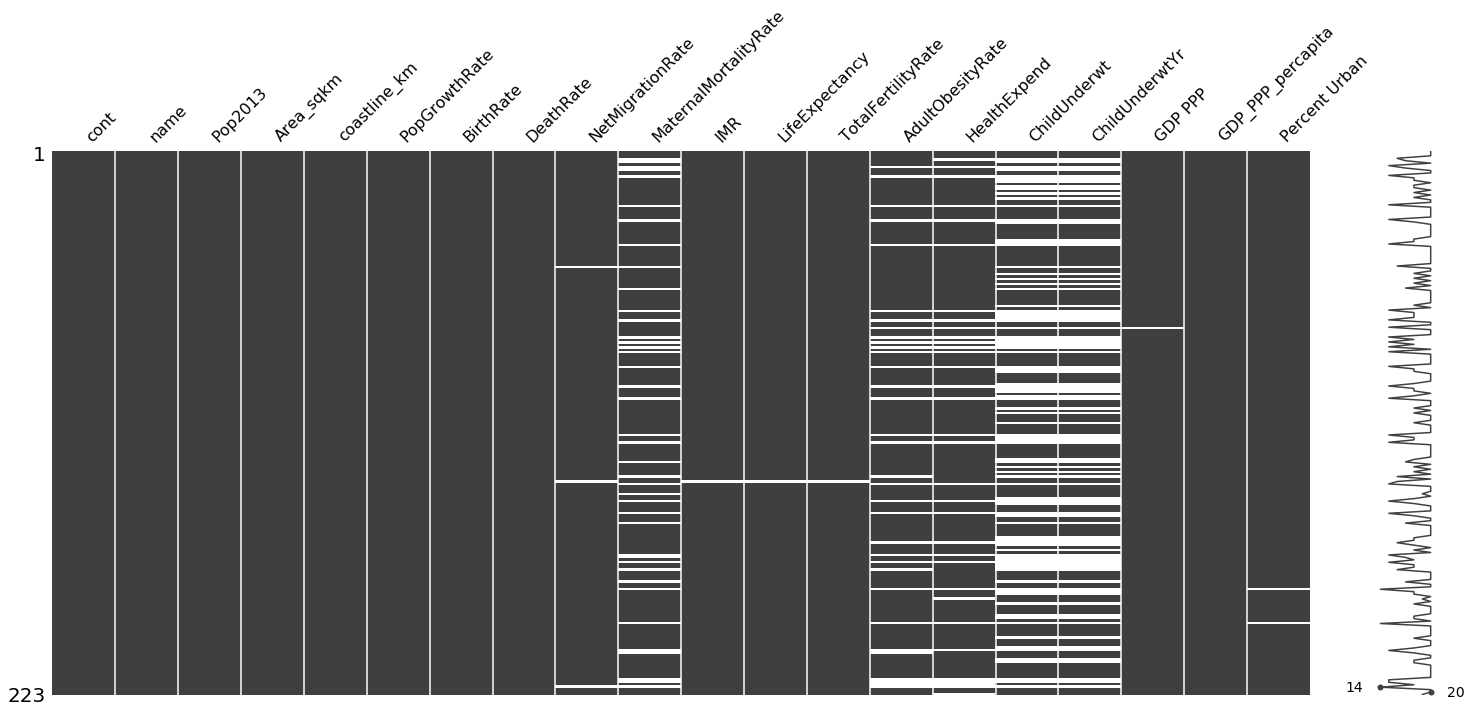

In [18]:
msno.matrix(fulldf)

In [19]:
df["MaternalMortalityRate"] =fulldf.groupby("cont").transform(lambda x: x.fillna(x.mean()))

In [20]:
def mynafill(var):
    df[var] =fulldf.groupby("cont").transform(lambda x: x.fillna(x.mean()))

In [21]:
mynafill("NetMigrationRate")
mynafill("IMR")
mynafill("LifeExpectancy")
mynafill("TotalFertilityRate")
mynafill("AdultObesityRate")
mynafill("HealthExpend")
mynafill("ChildUnderwt")
mynafill("GDP PPP")
mynafill("Percent Urban")

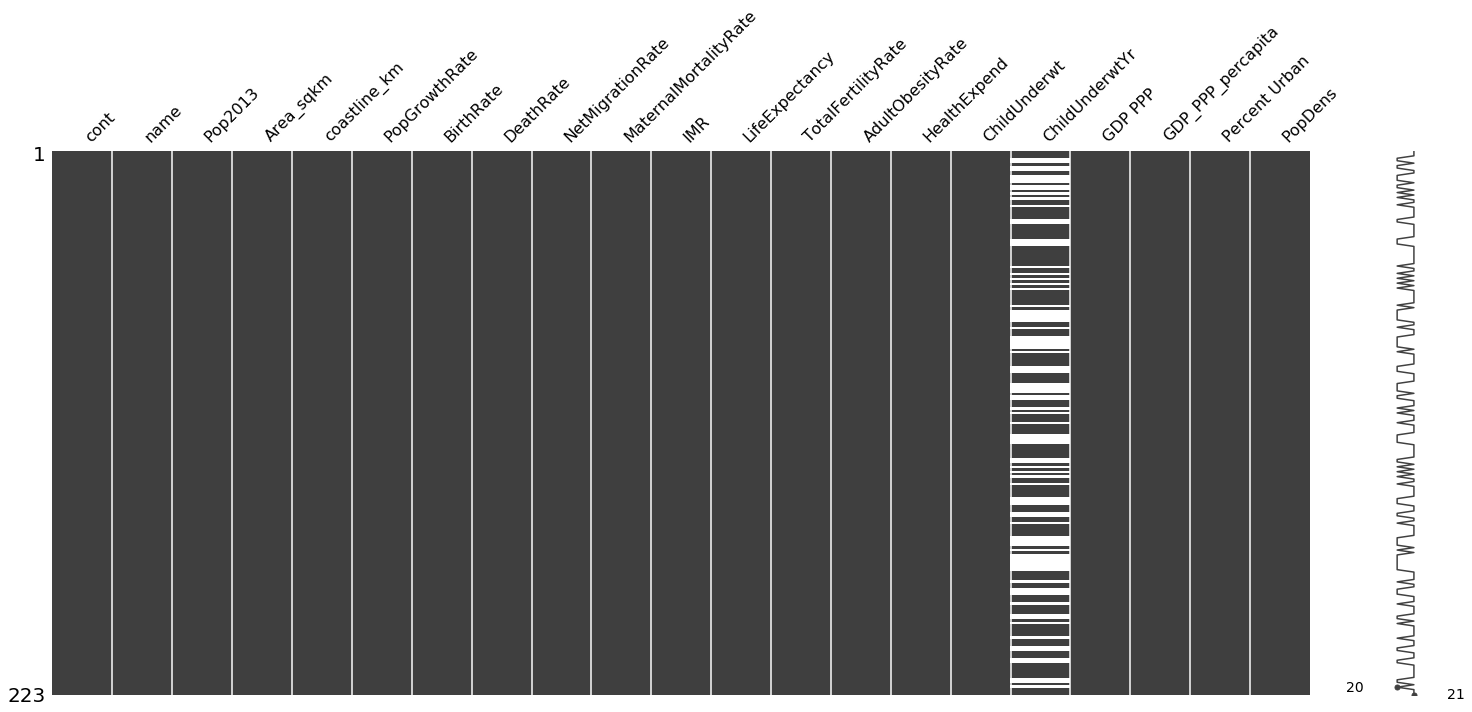

In [22]:
msno.matrix(df)

In [23]:
df.drop(columns = 'ChildUnderwtYr', inplace=True)
Y=df['cont']
name=df['name']
X=df
X.drop(columns = 'cont', inplace=True)
X.drop(columns = 'name', inplace=True)

In [24]:
print(np.unique(Y))

['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America']


In [25]:
X.tail()

,Pop2013,Area_sqkm,coastline_km,PopGrowthRate,BirthRate,DeathRate,NetMigrationRate,MaternalMortalityRate,IMR,LifeExpectancy,TotalFertilityRate,AdultObesityRate,HealthExpend,ChildUnderwt,GDP PPP,GDP_PPP_percapita,Percent Urban,PopDens
218,2676740.0,5860.0,0.0,2.03,23.81,3.53,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2.03,2900.0,2.03,456.781570
219,538811.0,266000.0,1110.0,2.96,31.18,8.64,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2500.0,2.96,2.025605
220,25408288.0,527968.0,1906.0,2.50,31.63,6.64,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2300.0,2.50,48.124674
221,14222233.0,752618.0,0.0,2.89,42.79,13.17,2.89,2.89,2.89,2.89,2.89,2.89,2.89,2.89,2.89,1700.0,2.89,18.897014
222,13182908.0,390757.0,0.0,4.38,32.41,11.40,4.38,4.38,4.38,4.38,4.38,4.38,4.38,4.38,4.38,600.0,4.38,33.736844


In [44]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [ ]:
svc = SVC()
gridsvc = GridSearchCV(svc, {"C": [0.2, 0.5, 0.7], "kernel": ['linear', 'poly', 'rbf'], 
                                'degree': [1, 2, 3], 'gamma': [1, 5, 11]}, scoring='accuracy')
gridsvc.fit(X, Y)
print("Best Params: {}".format(gridsvc.best_params_))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
clf = KNeighborsClassifier()
gridsearch = GridSearchCV(clf, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]})
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_, average=None))
y_pred_train = gridsearch.predict(X_train)
print("Train F1: {}".format(f1_score(y_train, y_pred_train, average=None)))
print("Test Classification Report:")
y_pred_test = gridsearch.predict(X_test)
print(classification_report(y_test, y_pred_test))
print("Train Accuracy: {}\tTest accuracy: {}".format(accuracy_score(y_train, y_pred_train),
                                                     accuracy_score(y_test, y_pred_test)))

Best Params: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Train F1: [0.58252427 0.48       0.27692308 0.45714286 0.42857143 0.        ]
Test Classification Report:
               precision    recall  f1-score   support

       Africa       0.50      0.56      0.53         9
         Asia       0.43      0.75      0.55         8
       Europe       0.60      0.27      0.37        11
North America       0.20      0.50      0.29         2
      Oceania       0.00      0.00      0.00         3
South America       0.00      0.00      0.00         1

  avg / total       0.44      0.44      0.41        34

Train Accuracy: 0.4497354497354497	Test accuracy: 0.4411764705882353


C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Izzy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
